In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df=pd.read_csv("/content/Visadataset.csv")

In [5]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
df.shape

(25480, 12)

In [6]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [8]:
df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [9]:
pip install missingno

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

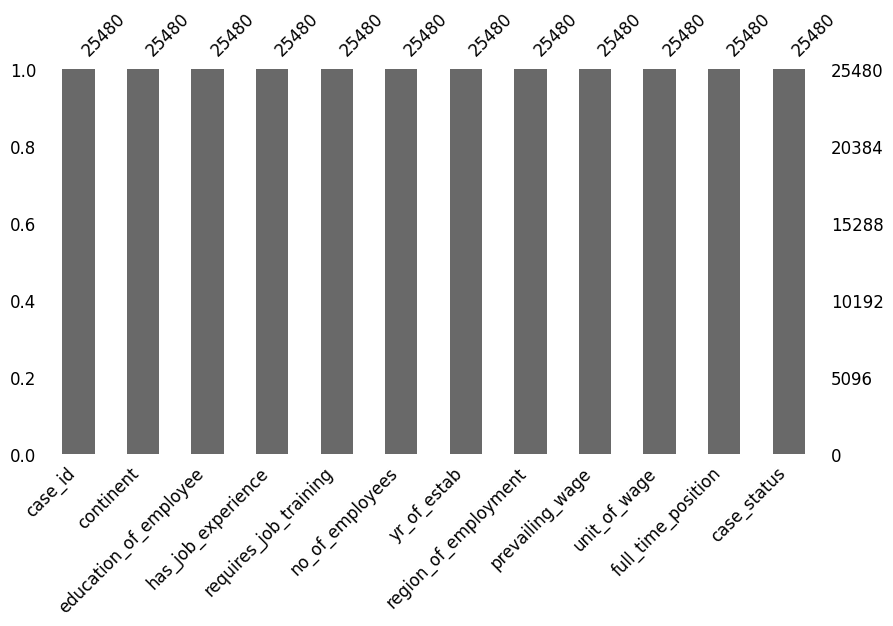

In [10]:
import missingno
missingno.bar(df,figsize=(10,5),fontsize= 12);

In [11]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [13]:
df["education_of_employee"].value_counts()

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

In [14]:
for col in categorical_features:
  print(df[col].value_counts(normalize = True) * 100)
  print("-------------")


EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: case_id, Length: 25480, dtype: float64
-------------
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: continent, dtype: float64
-------------
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: education_of_employee, dtype: float64
-------------
Y    58.092622
N    41.907378
Name: has_job_experience, dtype: float64
-------------
N    88.402669
Y    11.597331
Name: requires_job_training, dtype: float64
-------------
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: region_of_employment, dtype: float64
--

##**insights**

###*case_id = have unique values for each cils which can be dropped as it of no importance

###*continent = cols in highly biased towards asia.hence we can combine other categories to form a single catergory

###**unit_of_Wage = seems to be an imp cols as most of them are yearly contract









#UNIVARIATE ANALYSIS

Numeric feature

In [15]:
numeric_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

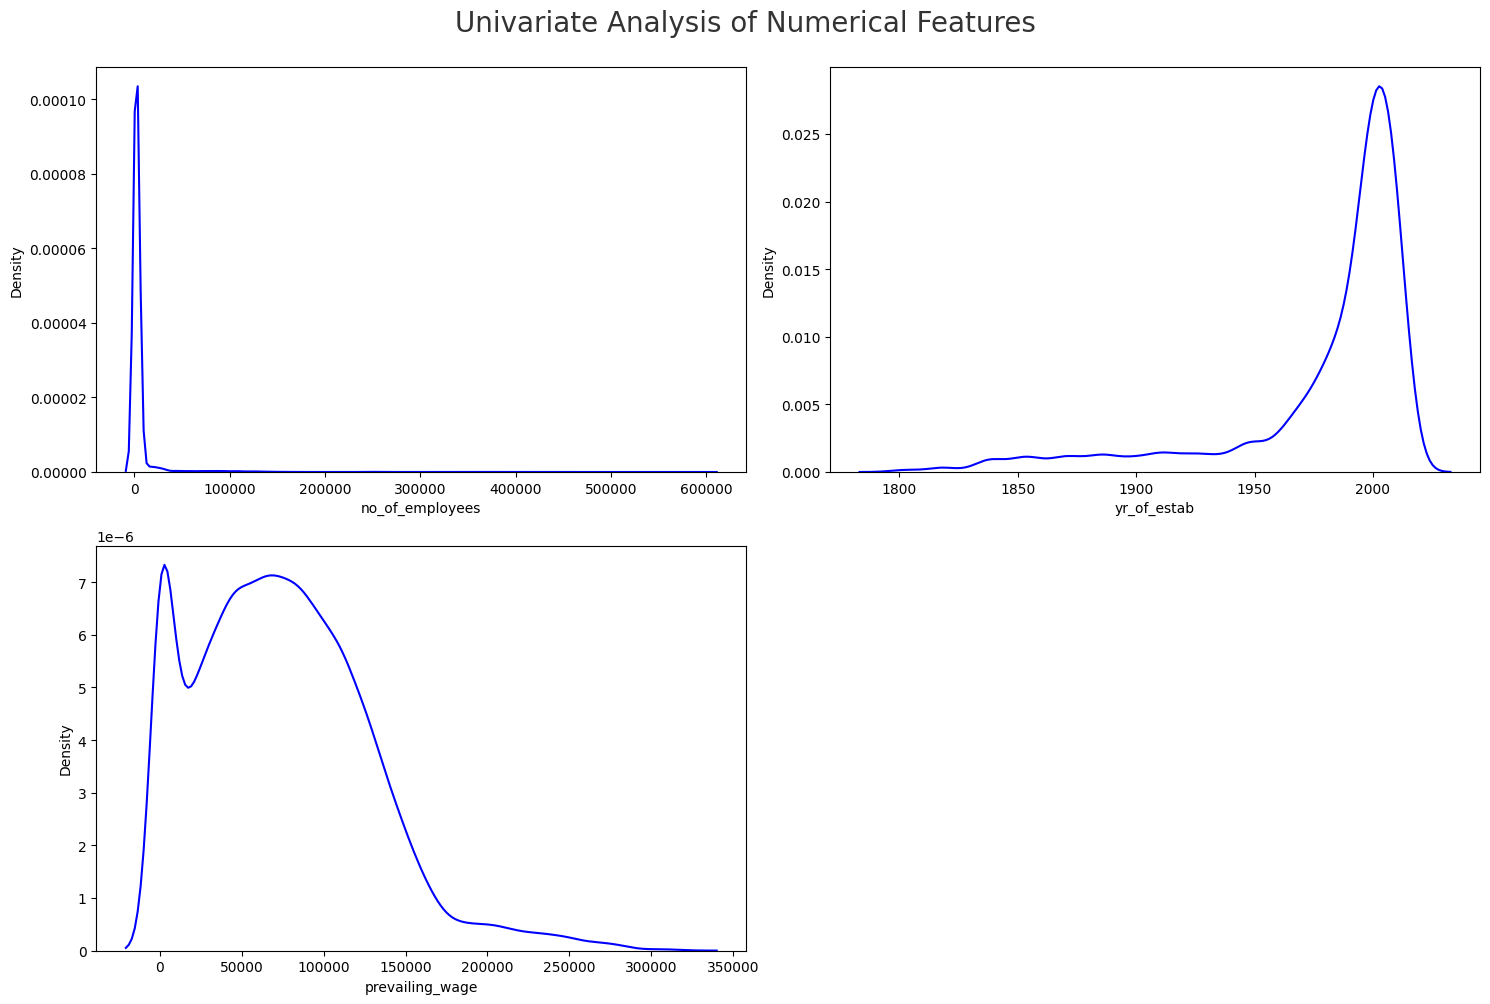

In [16]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of Numerical Features",fontsize=20,fontweight=20,alpha =0.8,y=1)

for i in range(0,len(numeric_features)):
  plt.subplot(2,2,i+1)
  sns.kdeplot(x=df[numeric_features[i]],color="blue")
  plt.xlabel(numeric_features[i])
  plt.tight_layout()


#categorcial feature

In [ ]:

plt.figure(figsize=(20,12))
plt.suptitle("Univariate Analysis of categorical Features",fontsize=20,fontweight=20,alpha =0.8,y=1)

for i in range(0,len(categorical_features)):
  plt.subplot(3,3,i+1)
  sns.countplot(x=df[categorical_features[i]],color="black")
  plt.xlabel(categorical_features[i])
  plt.tight_layout()


In [ ]:
df.columns

In [ ]:
categorical_features

#Multivariate analysis

In [ ]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

In [ ]:
df[(list(df.columns)[1:])].corr()

In [ ]:
df1=df.copy()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="Blues",annot = True)
plt.show()

In [ ]:
|from scipy.stats import chi2_contingency